In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [43]:
data_20 = pd.read_csv('churn_bigml_20.csv')
data_80 = pd.read_csv('churn_bigml_80.csv')

In [44]:
print(data_20.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [45]:
print(data_20.head())

  State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95   

In [46]:
print(data_80.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [47]:
print(data_80.head())

  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [48]:
data = pd.concat([data_80, data_20], ignore_index=True)

In [49]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train_encoded = pd.get_dummies(X_train, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['State', 'International plan', 'Voice mail plan'], drop_first=True)

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [53]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [54]:
predictions = model.predict(X_test_scaled)

In [55]:
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

In [56]:
print("Accuracy:", accuracy)


Accuracy: 0.8650674662668666


In [57]:
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[559  15]
 [ 75  18]]


In [58]:
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.97      0.93       574
        True       0.55      0.19      0.29        93

    accuracy                           0.87       667
   macro avg       0.71      0.58      0.61       667
weighted avg       0.83      0.87      0.84       667



In [59]:
accuracy = accuracy_score(y_test, predictions)
classification_rep = classification_report(y_test, predictions, output_dict=True)
precision = classification_rep['weighted avg']['precision']
recall = classification_rep['weighted avg']['recall']
f1_score = classification_rep['weighted avg']['f1-score']


In [60]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

Accuracy: 0.8650674662668666
Precision: 0.8348201866947226
Recall: 0.8650674662668666
F1-Score: 0.836291646040745


In [61]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1_score]
plt.figure(figsize=(10, 5))



<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

(0.0, 1.0)

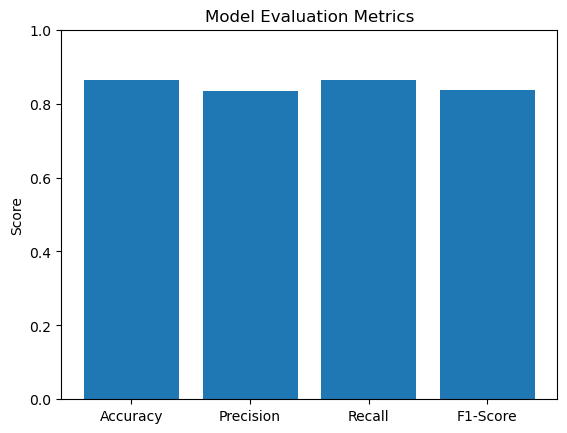

In [62]:
plt.subplot(1, 1, 1)
plt.bar(metrics, values)
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.ylim([0, 1]) 

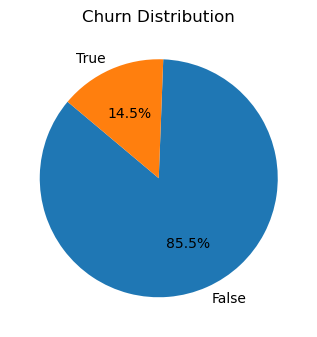

In [63]:
plt.subplot(1, 2, 2)
churn_distribution = y.value_counts()
labels = churn_distribution.index
sizes = churn_distribution.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Churn Distribution')

plt.tight_layout()
plt.show()

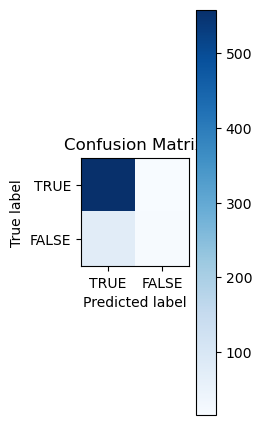

In [67]:
conf_matrix = confusion_matrix(y_test, predictions)
plt.subplot(1, 3, 3)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(['TRUE', 'FALSE']))
plt.xticks(tick_marks, ['TRUE', 'FALSE'])
plt.yticks(tick_marks, ['TRUE', 'FALSE'])
plt.ylabel('True label')
plt.xlabel('Predicted label')

plt.tight_layout()
plt.show()
